In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/iris/iris.data',header=None)

In [4]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
y=df.iloc[0:100,4].values # 4번째 col에 값들을 0번째~100번째 행

In [9]:
y=np.where(y=='Iris-setosa',-1,1) # y가 iris setosa면 -1 아니면 1

In [12]:
X=df.iloc[0:100, [0,2]].values

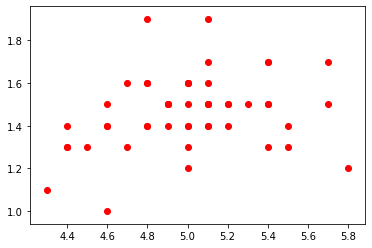

In [13]:
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')

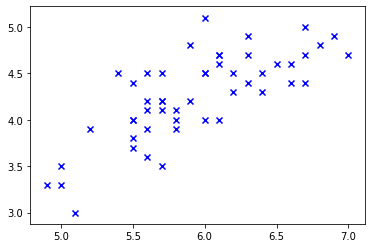

In [14]:
plt.scatter(X[50:100,0],X[50:100,1], color='blue',marker='x',label='versicolor')

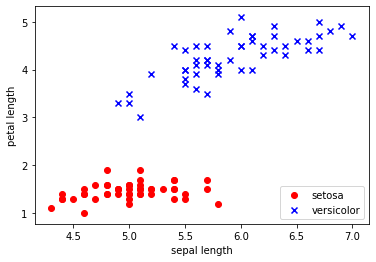

In [17]:
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1], color='blue',marker='x',label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='lower right')
plt.show()

In [19]:
class Perceptron(object):
    """퍼셉트론 분류기
    
    매개변수 :
    eta : 0~1사이의 수 학습률.
    n_iter : 정수. 훈련 데이터셋 반복 횟수
    random state : 정수. 난수 생성기 시드
    속성:
    w_ : 1d-array 학습된 가중치
    errors_ : list 에포크마다 누적된 분류 오류
    """
    def __init__(self , eta=0.01, n_iter=50, random_state=1):
        self.eta=eta
        self.n_iter =n_iter
        self.random_state=random_state
    
    def fit(self, X, y):
        """훈련 데이터 학습
        매개변수:
        X : shape= [n_samples, n_features]
        y: 타깃값
        반환값:
        self: object
        """
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_=[]
        for _ in range(self.n_iter):
            errors=0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=update*xi
                self.w_[0:] += update
                errors += int(update !=0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def predict(self, X):
        """단위계단 함수로 클래스 레이블을 반환"""
        return np.where(self.net_input(X) >= 0.0 , 1,-1)

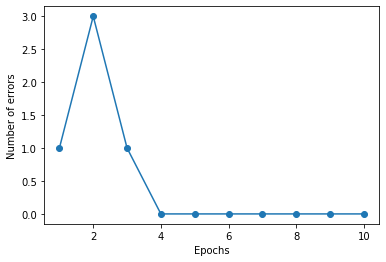

In [20]:
ppn=Perceptron(eta=0.1 , n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_)+1),
        ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.show()

In [21]:
from matplotlib.colors import ListedColormap

In [22]:
def plot_decision_regions(X,y,classifier, resolution=0.02):
    #마커 컬러맵 설정
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    #결정경계
    x1_min, x1_max = X[:,0].min()-1 , X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1 , X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3 , cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #산점도그리기
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                   y=X[y==cl,1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx], label=cl, edgecolor='black')

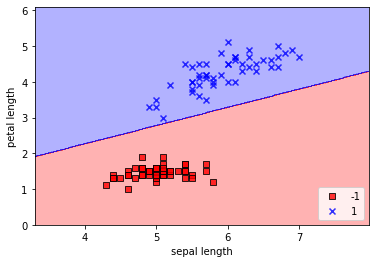

In [24]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='lower right')
plt.show()

### adaline 방법

In [33]:
tt=pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'])
m=[1,2,3]
print(tt)
tt.T.dot(m) ##transpose하고 곱해줌

   a  b  c
0  1  2  3
1  4  5  6
2  7  8  9


a    30
b    36
c    42
dtype: int32

In [36]:
class AdalineGD(object):
    """적응형 선형뉴런 분리기
    매개변수
    eta 학습률
    n_iter : 훈련데이터셋 반복횟수
    random_state : 가중치 무작위 초기화 하는 난수시드
    속성:
    w_ : 학습된 가중치
    cost_ : 에포크마다 누적된 비용함수 제곱합
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta=eta
        self.n_iter = n_iter
        self.random_state=random_state
        
    def fit(self, X, y):
        """훈련데이터 학습
        매개변수:
        X 훈련데이터셋
        y : 타깃값
        반환값:
        self : object"""
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0 , scale=0.01, size=1+X.shape[1])
        self.cost_=[]
        
        for i in range(self.n_iter):
            net_input=self.net_input(X)
            output = self.activation(net_input)
            errors= (y-output)
            self.w_[1:] +=self.eta *X.T.dot(errors)
            self.w_[0] +=self.eta*errors.sum()
            cost=(errors**2).sum()/2
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        #최종입력계산
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def activation(self, X):
        return X
    def predict(self, X):
        return np.where(self.activation(self.net_input(X))>=0 , 1,-1)

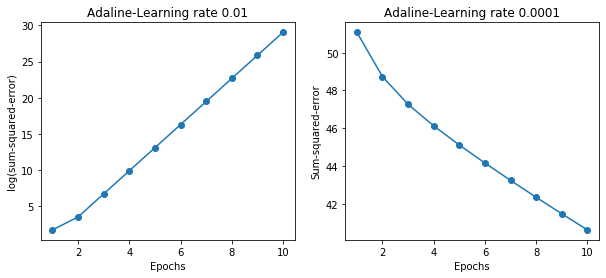

In [37]:
fig , ax = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
ada1=AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_),marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(sum-squared-error)')
ax[0].set_title('Adaline-Learning rate 0.01')
ada2=AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_)+1),
          ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline-Learning rate 0.0001')
plt.show()

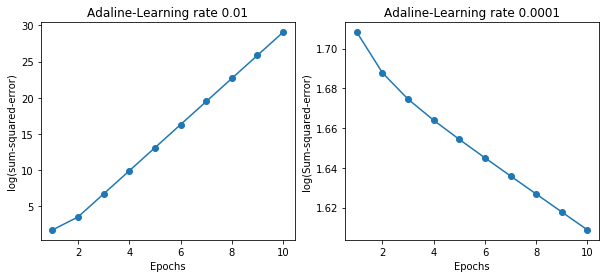

In [39]:
fig , ax = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
ada1=AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_),marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(sum-squared-error)')
ax[0].set_title('Adaline-Learning rate 0.01')
ada2=AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_)+1),
          np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline-Learning rate 0.0001')
plt.show()

### X들의 표준화

In [40]:
X_std = np.copy(X)
X_std[:,0]=(X[:,0]-X[:,0].mean()) / X[:,0].std()
X_std[:,1]=(X[:,1]-X[:,1].mean()) / X[:,1].std()

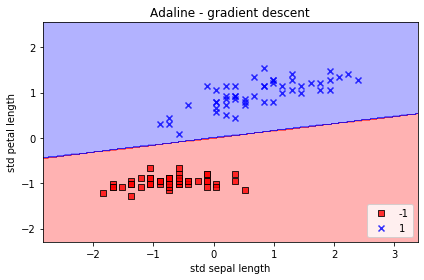

In [46]:
ada=AdalineGD(n_iter=50, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - gradient descent')
plt.xlabel('std sepal length')
plt.ylabel('std petal length')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

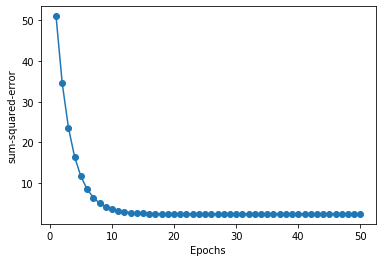

In [44]:
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('sum-squared-error')
plt.show()

### 확률적 경사 하강법을 사용한 adaline

In [49]:
class AdalineSGD(object):
    """Adaptive Linear Neuron 분류기
    매개변수:
    eta : 학습률
    n_iter : 훈련셋 반복횟수
    shuffle : T/F True일 경우 같은 반복이 되지 않도록 에포크마다 훈련데이터 섞음
    random_state : int 가중치무작위 초기화 위한 난수생성기
    속성:
    w_ : 학습된 가중치
    cost_ : list형태의 평균비용함수의 제곱합
    """
    
    def __init__(self, eta=0.01, n_iter=10, shuffle=True , random_state=None):
        self.eta=eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state=random_state
    
    def fit(self, X,y):
        #훈련데이터학습
        self._initialize_weights(X.shape[1])
        self.cost_=[]
        for i in range(self.n_iter):
            if self.shuffle:
                X,y = self._shuffle(X,y)
            cost=[]
            for xi , target in zip(X,y):
                cost.append(self._update_weights(xi, target))
            avg_cost=sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X,y):
        #가중치를 초기화하지 않고 훈련데이터 학습
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0]>1:
            for xi, target in zip(X,y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X,y)
        return self
    
    def _shuffle(self, X,y):
        #훈련데이터 섞기
        r=self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        #랜덤한 작은수로 가중치 초기화
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1+m)
        self.w_initialized = True
    
    def _update_weights(self, xi , target):
        #아달린 학습규칙으로 가중치 업데이트
        output = self.activation(self.net_input(xi))
        error= target-output
        self.w_[1:] += self.eta *xi.dot(error)
        self.w_[0] += self.eta *error
        cost = 0.5*error**2
        return cost
    
    def net_input(self, X):
        #최종입력계산
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def activation(self, X):
        #선형 활성화계산
        return X
    
    def predict(self, X):
        #단위 계단함수로 클래스레이블 반환
        return np.where(self.activation(self.net_input(X))>=0 ,1,-1)

In [50]:
ada = AdalineSGD(n_iter=15, eta=0.01 , random_state=1)
ada.fit(X_std, y)


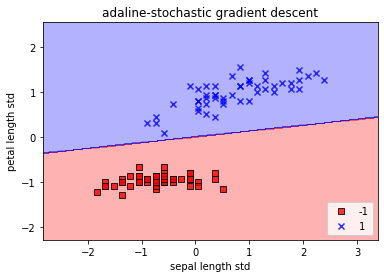

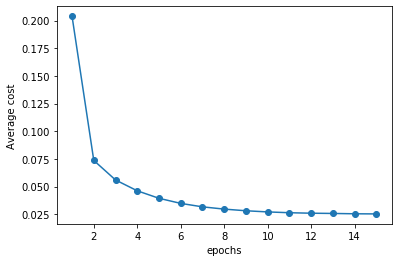

In [51]:
plot_decision_regions(X_std, y,classifier=ada)
plt.title('adaline-stochastic gradient descent')
plt.xlabel('sepal length std')
plt.ylabel('petal length std')
plt.legend(loc='lower right')
plt.show()
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('epochs')
plt.ylabel('Average cost')
plt.show()